In [11]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
import numpy as np
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
raw = pd.read_csv('sectors_sum_gas_demand_time_series_in_MW.csv', index_col = 0)

## Hierarchical aggregation, not normalized

In [13]:
def plotTS(data, periodlength, vmin, vmax, label = 'T [°C]'):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)

In [23]:
##Hierarchical aggregation with medoid representation and 10 typical days with 24 hourly segments

#Initialize an aggregation class object with hierarchical as method for eight typical days
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 10, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')
#Create the typical periods
typPeriods = aggregation.createTypicalPeriods()

#Predict original data
predicted10 = aggregation.predictOriginalData()
name_predicted10= "10 days:"
print(name_predicted10)
#Get accuracy indicators
aggregation.accuracyIndicators()

10 days:


,RMSE,RMSE_duration,MAE
1001,0.024825,0.007460,0.019183
2000,0.026691,0.007339,0.018789


In [24]:
##Hierarchical aggregation with medoid representation and 20 typical days with 12 irregular segments

aggregationSeg = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', segmentation=True, noSegments=12)

#Create the typical periods
typPeriodsSeg = aggregationSeg.createTypicalPeriods()

#Predict original data
predicted20 = aggregationSeg.predictOriginalData()
name_predicted20= "20 days:"
print(name_predicted20)
#Get accuracy indicators
aggregationSeg.accuracyIndicators()

20 days:


,RMSE,RMSE_duration,MAE
1001,0.017299,0.004243,0.013079
2000,0.016342,0.004564,0.011987


## Hierarchical aggregation, normalized

In [25]:
##Normalized
normed_raw = raw / raw.max()
        
##Hierarchical aggregation with medoid representation and 10 typical days, normalized

aggregationSegnorm = tsam.TimeSeriesAggregation(normed_raw, noTypicalPeriods = 10, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

#Create the typical periods
typPeriodsSegnorm = aggregationSegnorm.createTypicalPeriods()

#Predict original data
predicted10norm = aggregationSegnorm.predictOriginalData()
predicted10normb = predicted10norm * raw.max()
name_predicted10normb= "10 days normalized:"
print(name_predicted10normb)

#Get accuracy indicators
aggregationSegnorm.accuracyIndicators()

10 days normalized:


,RMSE,RMSE_duration,MAE
1001,0.024825,0.007460,0.019183
2000,0.026691,0.007339,0.018789


Text(0, 0.5, 'Duration Load in 1001 [MW]')

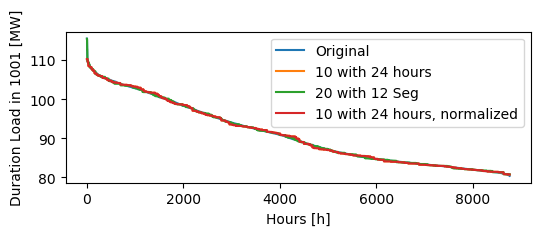

In [17]:
##Comparison of the aggregations 1001
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['1001'].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
predicted10['1001'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours')
predicted20['1001'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '20 with 12 Seg')
predicted10normb['1001'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours, normalized')
plt.legend()
plt.xlabel('Hours [h]')
plt.ylabel('Duration Load in 1001 [MW]')



Text(0, 0.5, 'Duration Load in 2000 [MW]')

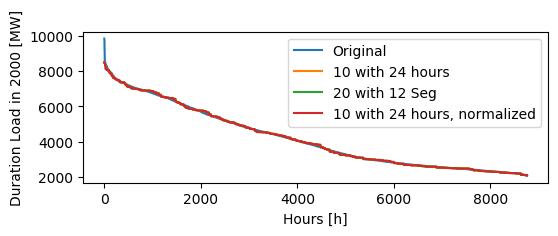

In [18]:
##Comparison of the aggregations 2000
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['2000'].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
predicted10['2000'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours')
predicted10['2000'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '20 with 12 Seg')
predicted10normb['2000'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours, normalized')
plt.legend()
plt.xlabel('Hours [h]')
plt.ylabel('Duration Load in 2000 [MW]')

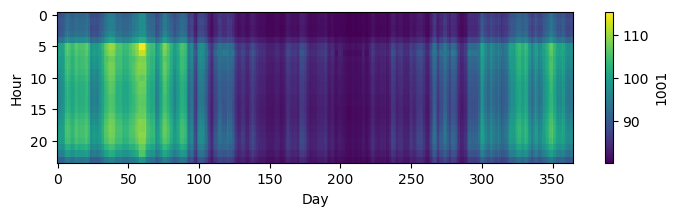

In [19]:
##Originale Daten 1001
param = '1001'
plotTS(raw[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

In [20]:
#1001, aggregation 10 days
plotTS(predictedPeriods[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

NameError: name 'predictedPeriods' is not defined

In [ ]:
#1001, aggregation 10days, normalized
plotTS(predictedPeriodsSegnormb[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

In [ ]:
#1001, aggregation 20days
plotTS(predictedPeriodsSeg[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

In [ ]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['1001']['20180210':'20180218'].plot(label = 'Original')
predicted10['1001']['20180210':'20180218'].plot(label = '10 with 24 hours')
predicted10normb['1001']['20180210':'20180218'].plot(label = '10 with 24 hours, normalized')
predicted20['1001']['20180210':'20180218'].plot(label = '20 with 12 seg')
plt.legend()
plt.ylabel('Load [MW]')

In [ ]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['2000']['20180210':'20180218'].plot(label = 'Original')
predicted10['2000']['20180210':'20180218'].plot(label = '10 with 24 hours')
predicted10normb['2000']['20180210':'20180218'].plot(label = '10 with 24 hours, normalized')
predicted20['2000']['20180210':'20180218'].plot(label = '20 with 12 seg')
plt.legend()
plt.ylabel('Load [MW]')

In [ ]:
aggregationSeg.createTypicalPeriods()

In [21]:
aggregation.createTypicalPeriods()

1001         2000
  TimeStep                        
0 0         85.432265  3012.459039
  1         86.043741  2962.543760
  2         85.592652  2902.633431
  3         86.073813  2987.501400
  4         88.539765  3581.597172
...               ...          ...
9 19        81.933822  2308.797530
  20        82.174403  2349.847200
  21        82.074161  2332.825630
  22        81.803508  2286.768440
  23        81.262201  2194.654060

[240 rows x 2 columns]

In [26]:
for segment in raw:
    print('Pearson correlation coefficient for ' + str(segment) + " :")
    print(name_predicted10)
    print(np.corrcoef(raw[segment],predicted10[segment])[0, 1])
    print(name_predicted10normb)
    print(np.corrcoef(raw[segment],predicted10normb[segment])[0, 1])
    print(name_predicted20)
    print(np.corrcoef(raw[segment],predicted20[segment])[0, 1])

Pearson correlation coefficient for 1001 :
10 days:
0.993983550243297
10 days normalized:
0.9939835502432972
20 days:
0.9970729820569205
Pearson correlation coefficient for 2000 :
10 days:
0.9926242135406244
10 days normalized:
0.9926242135406247
20 days:
0.9972346972013137
